## CS 506 Spring 2021 - HW2 
### Classification and Dimensionality Reduction (Total: 32 points)
#### Package Limitations: None

#### Name: Camden Kronhaus
#### BU ID: U79620042
#### BU Email: kronhaus@bu.edu

#### People you consulted working on this hw: None





### 1. Least Squares and Logistic Regression

In this section, we are going to compare two linear models for classification, especially when outliers are presented in the data. Please refer to Section 4.1.3 at Page 184 of the book [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) for the context of this problem as well as the explanation of Figure1

Figure 1: The comparison of least square and logistic regression in classification of two classes with/without outliers

![Figure 1](figure_1.png "some titile")

a) \[1 pt.\] Generate labeled random 2D points like the ones shown in the left subfigure of Figure1. Note that the red crosses and blue circles are points of different classes, so you may need to have a third column storing the label info of the 2D points. Let’s call this data “data without outlier”. Now on top of this data, add a few outliers to the blue circles just like the right subfigure of Figure1 and save the data as “data with outlier”. You may either use code or even manually choose some random 2D points. Your data need not to be exactly the same as the ones shown on the plots.

In [92]:
# feel free to write more helper function, but do NOT change the name of the provided function(s). 
# you may modify inputs and outputs of provided functions. If you do, make sure to indicate
# what the they are in the function docstring. This applies to every cells below


from typing import List, Dict, Tuple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_random_points(data, withoutlier: bool):
    """
    Plot data from generate_random_points(). Assumes classification and correct ordering of data
    
    :param data: data returned from generate_random_points()
    :param with_outlier: whether outlier is generated with the data points
    :return: 
    """
    # Plot to ensure data similarity
    x1 = data[0].iloc[0:50]
    x2 = data[0].iloc[51:100]
    y1 = data[1].iloc[0:50]
    y2 = data[1].iloc[51:100]

    plt.scatter(x1, y1, color="red", marker="x")
    plt.scatter(x2, y2, color="blue", marker="o", facecolors='none')
    if(withoutlier):
        x3 = data[0].iloc[101:110]
        y3 = data[1].iloc[101:110]
        plt.scatter(x3, y3, color="blue", marker="o", facecolors='none')
    # Scale axes correctly
    plt.xlim(-4,10)
    plt.ylim(-9,4)

    plt.show()


    return

def generate_random_points(with_outlier: bool):
    """
    Generate a few random points and return such dataset
    
    :param with_outlier: whether outlier is generated with the data points
    :return: dataset object (type of your choice)
    """
    # Generate gaussian normal distribution of points for clusters
    n_points = 50 # Number of points to geneerate in each cluster
    np.random.seed(0) # Set seed
    # x1, x2, x3, y1, y2, y3, x and values for different sets of points, after this ptoblem no ys are used
    x1 = np.random.normal(loc=-2, scale=.7, size = n_points)
    y1 = np.random.normal(loc= 2, scale=.7, size = n_points)
    x2 = np.random.normal(loc= 2, scale=.7, size = n_points)
    y2 = np.random.normal(loc= -1, scale=.7, size = n_points)


    # Concatenate data points for one 2D matrix
    data = np.concatenate((np.array(list(zip(x1,y1))),np.array(list(zip(x2,y2)))),axis=0)
    #Generate labels
    labels = np.concatenate((np.ones(n_points), np.ones(n_points)*-1))

    # Add outlier data if necessary
    if (with_outlier):
        n_outliers = 10 # number outliter points to generate
        x3 = np.random.normal(loc=9, scale=.5, size = n_outliers) 
        y3 = np.random.normal(loc=-6, scale=.5, size = n_outliers)

        #Add additional point belonging to class 1/blue class
        labels = np.concatenate((labels, np.ones(n_outliers)*-1))
        #Add to make "data_with_outliers"
        data = np.concatenate((data,np.array(list(zip(x3,y3)))),axis=0)

    data = np.column_stack((data,labels))
    data = pd.DataFrame(data)
    return data

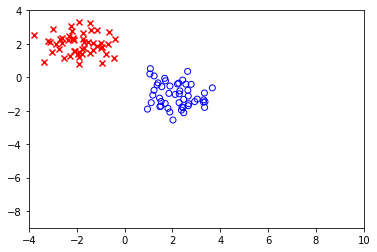

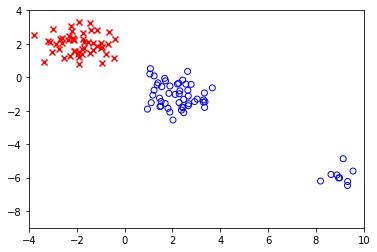

In [93]:
# Do some test print outs to verify correctness
data = generate_random_points(with_outlier=False)
plot_random_points(data, withoutlier=False)
data = generate_random_points(with_outlier=True)
plot_random_points(data, withoutlier=True)

b) \[4 pts.\] Use both the least squares method and the logistic regression method to classify the “data without outlier” and “data with outlier”.

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
def least_squares_classify(dataset):
    """
    Classifying dataset with least squares method
    
    :param dataset: the dataset object to classify
    :return: predicted labels
    """
    # Extract X
    X = np.column_stack((dataset[0],dataset[1])) # Combine dimensions into one X matrix
    y = dataset[2] # True labels for data
    
    # Account for bias term
    m = X.shape[0]
    X = np.array([np.ones(m), X[:, 0], X[:, 1]]).T 

    # Classify using linear regression/OLS
    reg = LinearRegression().fit(X, y)
    Y = reg.predict(X) # Predicted lables

    return Y

def logistic_regression_classify(dataset):
    '''
    Classifying dataset with logistic regression
    
    :param dataset: the dataset object to classify
    :return: predicted labels
    '''
   # Extract X
    X = np.column_stack((dataset[0],dataset[1])) # Combine dimensions into one X matrix
    y = dataset[2] # True labels for data

    # Classify
    reg = LogisticRegression().fit(X, y)
    Y = reg.predict(X) # Predicted lables
    # Make outputs discrete

    return Y



In [95]:
# Classify data with and without outlier here 
dataset = generate_random_points(with_outlier=False)
Y_LS = least_squares_classify(dataset)
Y_LR = least_squares_classify(dataset)
data = generate_random_points(with_outlier=True)
Y_LS_outliers = logistic_regression_classify(dataset)
Y_LR_outliers = logistic_regression_classify(dataset)

c) \[2 pts.\] Plot the classification results into two figures side by side just like Figure1. Have you got similar results like Figure1? Explain briefly why the logistic regression is not sensitive to outliers.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
def plot_classification_results(dataset):
    """
    Plot classification results of data with outlier and data without outlier - note results are the same so although logistic regression
    overrides linear regression results, the plot is the same had they been done separately
    
    :param dataset: mnist dataset as np array
    :return: 
    """

    # Reclassify using both methods - need classifier parameters to plot lines, I decided no to pass in all the necessary variables
    X = np.column_stack((dataset[0],dataset[1])) # Combine dimensions into one X matrix
    y = dataset[2] # True labels for data
    
    # Account for bias term
    m = X.shape[0]
    X_ls = np.array([np.ones(m), X[:, 0], X[:, 1]]).T 

    # Classify using linear regression/OLS
    reg_ls = LinearRegression().fit(X_ls, y)
    Y_ls = reg_ls.predict(X_ls) # Predicted lables for least squares/linear regression
    
    # Make labels discrete
    Y_ls[Y_ls>=0] = 1
    Y_ls[Y_ls<0] = -1

    # Classify using Logistic Regression
    reg_lr = LogisticRegression().fit(X, y)
    Y_lr = reg_lr.predict(X) # Predicted lables

    # Plot results with decision boundaries
    # figure(figsize=(12, 6))
    xmin, xmax = -4, 10
    ymin, ymax = -9, 4
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    colors = ["blue", "red"]
    
    # Plot Dataset Classified with Liner Regression
    plt.scatter(X[:,0], X[:,1], c=Y_ls, cmap=ListedColormap(colors))
    # Plot Line
    xplot = np.linspace(xmin, xmax, m)
    yestplot = -reg_ls.coef_[0] / reg_ls.coef_[2] - (reg_ls.coef_[1] / reg_ls.coef_[2]) * xplot
    plt.plot(xplot, yestplot, color="magenta", lw=1, ls='--')
    plt.xlabel('x1')
    plt.ylabel('x2')

    # Plot classified dataset with Logistic Regression
    plt.scatter(X[:,0], X[:,1], c=Y_lr, cmap=ListedColormap(colors))
    
    # Plot line
    # Help for this plotting came from: https://tinyurl.com/yfabs2dn
    b = reg_lr.intercept_[0]
    w1, w2 = reg_lr.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -4, 10
    ymin, ymax = -9, 4
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    xplot = np.array([xmin, xmax])
    yplot = m*xplot + c
    plt.plot(xplot, yplot, color='green', lw=1, ls='--')
    plt.show()

    return

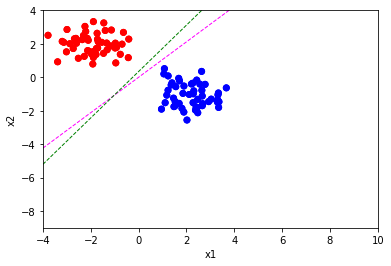

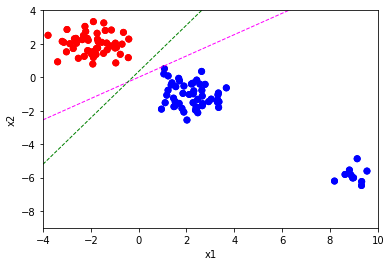

In [97]:
# Please note that the classification results that show the decision boundaries are in fact only technically for logistic regression as the classfication
# is overridden, but since the results are the same, the plots would be the same regardless
plot_classification_results(generate_random_points(with_outlier=False))
plot_classification_results(generate_random_points(with_outlier=True))

### 1c - Explain briefly why the logistic regression is not sensitive to outliers.
The results above are quite similar to the original figure, in the same way as the original figure, the least squares model is more affected.

As in the original figures, logistic regression is not as susceptible to outliers because it uses a sigmoud function for classifying pointss, which is asymptotic between 1 and 0, therefore extreme values have less impact since linear regression tries to fit a line across all the points.

### 2 Logistic Regression and kNN Classification

The goal of this problem is to perform classification on the famous MNIST dataset.

We have already preprocessed a sample of this dataset (30% of the original dataset), that you can find here: [Download from Google Drive](https://drive.google.com/open?id=1phX7-hv5FNye7mPzddr1oplZIhAgmycz) in the format of NumPy arrays.

File mnist data.npy contains an array of the data -each row corresponds to a 28 × 28 digit picture vectorized to create 28*28=784 features, while the file mnist labels.npy contains the respective labels of the images.

a) \[0 pts.\] Randomly split the dataset, using 20% of the samples as your test set and the remaining 80% as the train set that you will use to fit your models.

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split

'''
Take numpy representation off MNIST dataset and labels and split into training and test set
:param X: MNIST dataset
:return: Train/Test splits of MNIST dataset
'''
def split_mnist_data(X: np.array) -> Tuple[np.array, np.array, np.array, np.array]:
    #Split dataset

    y = X[:, -1] #grab class labels
    X = np.delete(X, -1, axis=1) #Remove labels column from dataset now that we have it

    X_train, X_test, y_train, y_test = \
    train_test_split(
        X, 
        y, 
        test_size=.20, 
        random_state=0
    )

    return X_train, X_test, y_train, y_test


def read_mnist_data(file_path: str) -> np.array:
    """
    Load numpy array of MNIST dataset from data.npy file
    
    :param file_path: string path to dataset 
    :return: numpy array representation of the mnist dataset and the labels dataset
    """

    X = np.load(file_path + "mnist_data.npy") #Mnist dataset
    y = np.load(file_path + "mnist_labels.npy") #Mnist labels dataset
    return np.column_stack((X,y))


b) \[2 pts.\] Try to classify the images using Logistic Regression. Have in mind that the dataset contains more than 2 labels, hence is a multinomial classification problem. What is your train accuracy and test accuracy?

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def logistic_regression_classify_mnist(dataset: np.array) -> Tuple[float, float]:
    """
    Classify mnist dataset with logistic regression
    
    :param dataset: mnist dataset as np array
    :return: train and test accuracy of the model
    """
    X_train, X_test, y_train, y_test = split_mnist_data(X)

    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    # Y = clf.predict(X_test)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)


    return train_acc, test_acc

In [104]:
dataset = read_mnist_data("./data/")
train_acc, test_acc = logistic_regression_classify_mnist(dataset)
print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.9596527777777778
Testing Accuracy:  0.8813888888888889


/Users/chrisjr38/Desktop/cs506_hmwk/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:  0.9589583333333334
Testing Accuracy:  0.8825

c) \[3 pts.\] Now, try to classify the dataset using a k-Nearest Neighbor classifier. Plot the train and test accuracy as you vary k from 1 to 25 with a step size of 2.


In [105]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

def knn_iter_k(dataset:np.array, k_min: int = 1, k_max: int = 25, step:int = 2):
    '''
    Plot training and testing accuracy for KNN with varying values of k
    :param dataset: MNIST daaset
    :param k_min: k value to start at
    :param k_max: k value to end at (inclusive)
    :param step: step size
    :return:
    '''
    # Loop through different values of k nearest neighbors


    # Create k values for loop (increase k_max by step size to include it)
    k_vals = np.arange(k_min,k_max+step, step)
    train_accs = []
    test_accs = []
    for k in k_vals:
        train_acc, test_acc = knn_classify_mnist(dataset, k)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    plt.figure(1)
    plt.plot(k_vals, train_accs ,'-bo')
    plt.title("Training Accuracy from k=" + str(k_min) + " to k=" + str(k_max))
    plt.xlabel("k")
    plt.ylabel("Training Accuracy")
    plt.show()

    plt.figure(2)
    plt.plot(k_vals, test_accs,'-bo')
    plt.title("Testing Accuracy from k=" + str(k_min) + " to k=" + str(k_max))
    plt.xlabel("k")
    plt.ylabel("Testing Accuracy")
    plt.show()


    return
    

def knn_classify_mnist(dataset: np.array, k: int, train_size="full")-> Tuple[float, float]:
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset: mnist dataset in numpy format
    :param k: value for K-nearest neighbors
    :param train_size: "Full" to use the whole training set, another value to specify the number of points of the training set to us
    :return: train and test accuracy of the model
    """

    X_train, X_test, y_train, y_test = split_mnist_data(dataset)
    
    # Use specified number of training samples
    if(train_size != "full"):
        X_train = X_train[0:train_size]
        y_train = y_train[0:train_size]

    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    # Y = neigh.predict(X_test)
    train_acc = neigh.score(X_train, y_train)
    test_acc = neigh.score(X_test, y_test)

    return train_acc, test_acc

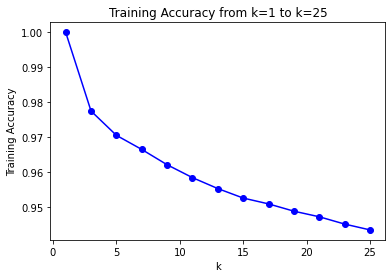

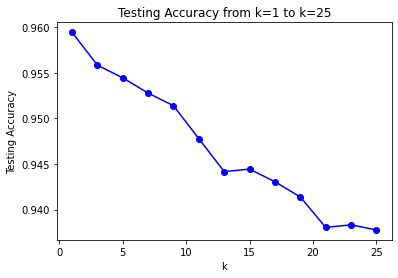

In [106]:
knn_iter_k(read_mnist_data("./data/"), k_min=1, k_max=25, step=2)

d) \[1 pt.\] Explain your results.


At k=1, we have the highest accuracy for testing and training. For the training data k=1 should always yield 100% accuracy since we are providing the same points KNN was trained on, therefore the nearest neighbor to the point will always be the same point that was originally provided and will always be 100%, no matter how much of the training set we use. As for the testing data, a low k makes sense, in our case using the random split of 0 gave us that k=1 was the best (although in some other tests k=2 provided the best result). The reason for this is due to the high dimenisonality of images. Because the dataset uses MNIST, points are very far from one another in general, and points are also a similar distance to one another, even if they are different classes, so simply choosing the very closest point haappens to yield the bestt results.

e) \[5 pts.\] Now use kNN to explore how a different sized train set affects your results. Plot the accuracy of your model when only using 3,000 of the images in the train set (repeat this experiment using 6,000, 9,000, and so on until you are using the full train set). Use whatever value of k you found that worked best in part (c). You will be doing something similar in Problem 3(d) so it makes sense to run both experiments at the same time.

In [7]:
from sklearn.model_selection import train_test_split
def sample_dataset(dataset: np.array, select_size: int) -> np.array:
    """
    Randomly sample a certain size of the dataset
    
    :param select_size: the return size of dataset
    :return: random subset of dataset
    """
    X_train, X_test, y_train, y_test = split_mnist_data(X)
    # Dataset already shuffled from split, so take first select_size points
    X_train = X_train[0:select_size]
    y_train = y_train[0:select_size]
    return np.column_stack(X_train, y_train)


def knn_experiment(dataset: np.array, train_min: int = 3000, step: int = 3000):
    '''
    Run Knn while iterating the size of the training set
    :param dataset: MNIST dataset
    :param train_min: training size to start with
    :param step: step size to increase training size
    :return: List of training accuracies and list of test accuracies and list of train sizes
    '''

    X_train, X_test, y_train, y_test = split_mnist_data(dataset)
    #Finish when training size is at max
    train_max = X_train.shape[0]
    
    # Generate values of training set sizes to pass to KNN
    train_sizes = np.arange(train_min, train_max+step, step)
    
    train_accs = []
    test_accs = []
    for train_size in train_sizes:
        train_acc, test_acc = knn_classify_mnist(dataset, k=1, train_size=train_size)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        

    return train_accs, test_accs, train_sizes
    
def plot_accuracies_over_train_sizes(train_accs: list, test_accs: list, train_sizes: list):
    """
    Plot the accuracies over training size
    
    :param train_accs: list of train accuracies of the model
    :param test_accs: list of test accuracies of the model
    :param train_sizes: the list of training sizes in the experiment
    :return: 
    """
    plt.figure(1)
    plt.plot(train_sizes, train_accs,'-bo')
    plt.title("Training Accuracy varying training set size")
    plt.xlabel("k")
    plt.ylabel("Training Accuracy")
    plt.show()

    plt.figure(2)
    plt.plot(train_sizes, test_accs,'-bo')
    plt.title("Testing Accuracy varying training set size")
    plt.xlabel("k")
    plt.ylabel("Testing Accuracy")
    plt.show()

    return

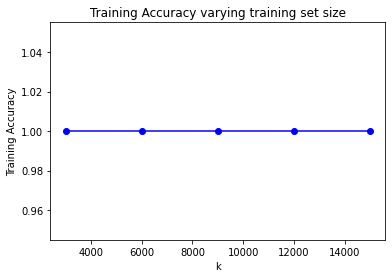

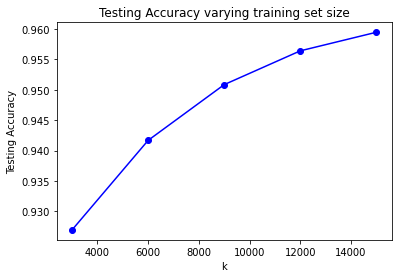

In [192]:
train_accs, test_accs, train_sizes = knn_experiment(dataset = read_mnist_data("./data/"), train_min=3000, step=3000)
plot_accuracies_over_train_sizes(train_accs, test_accs,train_sizes)

f) \[2 pts.\] Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression.

Firstly, we've already explored that linear regression is much more susceptible to "outlier" datapoints than logistic regression. In general, for classification problems, logistic regression should be used because of the this, and that it can output probabilities a pont is in a given class to give confidence that a point is in a given class. Linear regression should be used if the data is known to be linear, and not have outliers. Linear regression is mainly meaant to be used for estimating a linear function along independent variables, whereas logistic regression is meant to classify binary variables.

### PCA - Dimensionality Reduction

The original dataset contains 28 ∗ 28 = 784 features. Therefore, we will try to reduce the dimension by using PCA.

a) \[1 pt.\] Perform PCA decomposition, initially using all principal components. Before performing PCA you usually need to mean-center the data, [see here why](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), which means you have to calculate the mean of each variable (column) and subtract it from the respective column. However, many libraries perform this step implicitly, so consult the documentation of the library you are going to use (e.g. PCA of Sklearn).

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from typing import Optional
def pca_decomposition(X: np.array, num_components: Optional[int] = None) -> np.array:
    """
    Perform PCA decomposition over mnist dataset
    
    :param X: mnist dataset in numpy format *with no labels attached
    :param num_components: number of components to reduce to. If None, use all of components
    :return: transformed dataset and explained variance
    """
    pca = PCA(n_components=num_components, random_state=0).fit(X)
    return pca.transform(X), pca.explained_variance_


In [194]:
X = read_mnist_data("./data/")
y = X[:,-1]
X = np.delete(X, -1, axis=1) # Remove labels from dataset
X_transformed, variance = pca_decomposition(X)

b) [2 pts.] Plot the CDF of the explained variance as a function of the number of principal components.


In [31]:
from scipy.stats import norm
import matplotlib.pyplot as plt
def plot_pca_cdf(X: np.array):
    """
    Plot CDF of explained variance as a function of number of principal components
    
    :param X: MNIST dataset with no labels
    :return: 
    """
    X_transformed, variance = pca_decomposition(X)
    cdf = np.cumsum(variance)/np.sum(variance) # Calculate cdf from variance
    n_components = np.linspace(1, 784, 784) # Create values to plot against
    plt.plot(n_components,cdf)
    plt.axvline(x=150, linestyle="--", lw=1)
    plt.axhline(y=1, linestyle="--", lw=1)
    plt.xlim(0, 784)
    plt.title("CDF vs # Principle Components for MNIST")
    plt.xlabel("# Principle Components")
    plt.ylabel("CDF")






    return

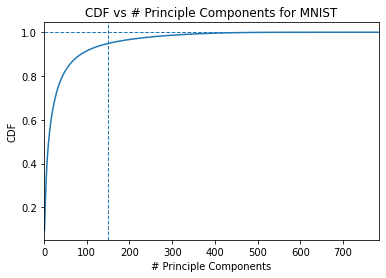

In [32]:
X = read_mnist_data("./data/")
y = X[:,-1]
X = np.delete(X, -1, axis=1) # Remove labels from dataset
plot_pca_cdf(X)

c) [1 pt.] Choose a number of principal components to use by arguing why your choice is reasonable as a trade-off between the number of components used and classification performance. Afterwards, train a kNN classifier (choose a k that gave you the best results in Problem 2c.) and report train and test accuracy.


The number of principle components I'll be using is 150. Around 100 is when it reaches a point of slowing down how much each new component contributes to explaining the dataset. Since there is still a bit of noticable increase up to aabout 150 (as marked), so I decided to use 150. For KNN, k=1 will be used again as in Problem 2.

In [10]:
import time
import numpy as np
from sklearn.decomposition import PCA
def knn_classify_mnist_with_pca(dataset: np.array, k: int, num_components: int) -> Tuple[float, float]:
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset: mnist dataset in numpy format
    :param k: number of nearest neighbors
    :param num_components: number of components to keep after PCA
    :param train_size: size of training set to use, default "full" uses all
    return: train and test accuracy of the model
    """
    y = dataset[:,-1] # Grab labels
    X = np.delete(dataset, -1, axis=1) # Remove labels from dataset
    X_train, X_test, y_train, y_test = split_mnist_data(dataset)

    # Perform PCA
    pca = PCA(n_components=num_components, random_state=0).fit(X)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)


    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    # Y = neigh.predict(X_test)
    train_acc = neigh.score(X_train, y_train)
    test_acc = neigh.score(X_test, y_test)

    return train_acc, test_acc

In [17]:
train_acc, test_acc = knn_classify_mnist_with_pca(read_mnist_data("./data/"),k=1,num_components=150)
print(train_acc)
print(test_acc)

1.0
0.9619444444444445


Training Accuracy:  1.0 / 100%
Testing Accuracy:  0.9619444444444445 / 96.19%

d) [5 pts.] For this part we will perform the following experiment: First, randomly sample a part of your dataset (using a fixed k and all features), of size ranging from 3,000 to 21,000 (the whole dataset) in increments of 3,000. Fit a kNN classifier and plot the running time.
Now, use a fixed k and all samples of your dataset, but fit a kNN classifier using a varying number of Principal Components, ranging from 50 to 750 in increments of 100. Plot the running time on the same plot as above.

Describe the plot. What seems to affect -as a trend- the fitting time more? Number of samples used for trying, or the dimensions of the data?

-Python’s time package may be useful for this problem.


In [11]:
def train_size_experiment(dataset=np.array):
    """
    Experiment classifying mnist with different training size
    
    :param dataset: mnist dataset
    :return train_sizes, times: list of training sizes used and the times to classify using each
    """

    train_max = split_mnist_data(dataset)[0].shape[0] # Max size of training data
    # Finish when training size is at max
    train_min = 3000
    #Step size
    step = 3000
    # Generate values of training set sizes to pass to KNN
    train_sizes = np.arange(train_min, train_max+step, step)
    
    times = []
    for train_size in train_sizes:
        start = time.time()
        knn_classify_mnist(dataset,k=1, train_size=train_size)
        end = time.time()
        times.append(end-start)
    times = [round(time,2) for time in times] # Round times to two decimal places
    return train_sizes, times
    
def num_component_experiment(dataset=np.array) :
    """
    Experiment classifying mnist with different number of top principal components
    
    :param dataset: mnist dataset
    :return train_sizes, times: list of training sizes used and the times to classify using each
    """


    min_components = 50
    max_components = 750
    step = 100

    component_sizes = np.arange(min_components, max_components+step, step)
    
    times = []
    for component_size in component_sizes:
        start = time.time()
        knn_classify_mnist_with_pca(dataset=dataset,k=1,num_components=component_size)
        end = time.time()
        times.append(end-start)
    times = [round(time,2) for time in times] # Round times to two decimal places
    

    return component_sizes, times

def plot_times(train_sizes, component_sizes, train_size_times,component_times):
    '''
    Plot time to classify with varying number off components with PCA and different training sizes
    '''
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    ax1.plot(train_sizes, train_size_times, "-bo",label="Varied Training Size")
    ax1.legend(loc='lower right')
    ax1.set_xlabel("Training Set Size")
    ax1.set_ylabel("Classification Time (s)")
    ax2 = ax1.twiny()
    ax2.set_xlabel("Number of Components")
    ax2.plot(component_sizes, component_times, "-ro",label="Varied # Components")
    ax2.legend(loc='upper left')
    
    plt.title("Varying training size and #PCA Components for KNN Classification")
    plt.show()
    return

[ 3000  6000  9000 12000 15000]
[0.69, 1.88, 3.61, 5.36, 8.6]
[ 50 150 250 350 450 550 650 750]
[5.82, 5.84, 6.84, 7.76, 9.25, 10.35, 8.56, 8.78]


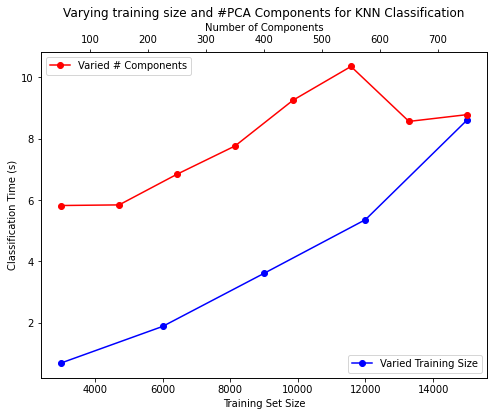

In [42]:
dataset = read_mnist_data("./data/")
train_sizes, train_size_times = train_size_experiment(dataset)
print(train_sizes) # If train_size > size of training data, it simply takes the whole array which is what is needed
print(train_size_times)
component_sizes, component_times = num_component_experiment(dataset)
print(component_sizes)
print(component_times)
plot_times(train_sizes, component_sizes, train_size_times,component_times)

e) [3 pts.] Using your results from the previous question, produce the most accurate model you can on the condition that it is faster than 50% of the models you tested. List the values chosen for: k, number of samples, and number of principal components. How does this model compare to your most accurate model (the best model you created when time wasn’t a factor)?


In [38]:
def fast_model(dataset: np.array) -> Tuple[float, float]:
    """
    Classify using a model that is 50% faster than the others tested

    :param dataset: mnist dataset in numpy format
    :return: testing accuracy and running time of model
    """
    # start = time.time()

    training_size = 12000
    k = 1
    num_components = 150
    y = dataset[:,-1] # Grab labels
    X = np.delete(dataset, -1, axis=1) # Remove labels from dataset
    X_train, X_test, y_train, y_test = split_mnist_data(dataset)
    
    # pca
    pca = PCA(n_components=num_components, random_state=0).fit(X)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    #KNN
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)


    # Classify and find testing accuracy
    start = time.time()
    test_acc = neigh.score(X_test, y_test)
    end = time.time()
    runtime = end - start



    return test_acc , runtime
    

In [39]:
print(fast_model(dataset = read_mnist_data("./data/")))

(0.9619444444444445, 0.9315550327301025)


Using k=1, 150 Principle Components, and Training Size of 12000, I achieved accuracy of 96.19% and runtime of .93s, faster than all the models plotted in the previous problems but one, starting the timer before classification begins and after preprocessing. If I start the time before preprocessing, as soon as the function is called, it runs in 2.73s, still faster than all but 2 models tested in the previous problem.

f) [1 pt.] Bonus point: Plot the images of the 10 first Principal Components. That is, plot the image approximation using each principle component.

In [2]:
def plot_components(top_components: int):
    """
    Plot top 10 principal components
    
    :param top_components: number of top components to plot
    :return: 
    """
    dataset = read_mnist_data("./data/")
    y = dataset[:,-1] # Grab labels
    X = np.delete(dataset, -1, axis=1) # Remove labels from dataset
    X_train, X_test, y_train, y_test = split_mnist_data(dataset)

    # Perform PCA
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("Original Image")
    pca = PCA(n_components=top_components, random_state=0).fit(X)
    reconstruction = pca.inverse_transform(pca.transform(X))[0]
    plt.imshow(X[0].reshape(28,28), cmap='gray')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("Top 10 Principle \n Components Reconstructed")
    # plt.imshow(reconstruction.reshape(28,28), cmap='gray')
    plt.imshow(pca.components_[0].reshape(28,28), cmap='gray')

    plt.subplot(2,2,1)
    plt.axis('off')
    plt.title("Original Image")
    plt.imshow(X[1].reshape(28,28), cmap='gray')
    plt.subplot(2,2,2)
    plt.axis('off')
    plt.title("Top 10 Principle \n Components Reconstructed")
    # plt.imshow(reconstruction.reshape(28,28), cmap='gray')
    plt.imshow(pca.components_[1].reshape(28,28), cmap='gray')

    return

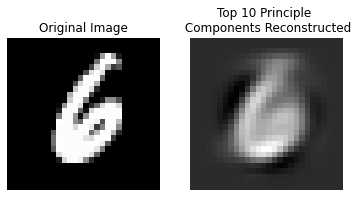

In [75]:
plot_components(top_components=10)